------

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [2]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Cargar datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv('megaline_calls.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_plans = pd.read_csv('megaline_plans.csv')
df_users = pd.read_csv('megaline_users.csv')


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Los nombres de columna no tienen espacios y estan en snake_case por lo que no hay ningun problema en ese aspecto. Tampoco presentan datos nulos ni duplicados.

En cuanto a los tipos de cada columna es preferible que los precios usd_per_gb y usd_monthly_pay sean de tipo float para prevenir errores  tomando en cuenta que seguramente haremos calculos con centavos mas adelante.

Adicionalmente la columna plan_name sería mejor cambiarla a tipo category.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [6]:
# Cambiar mb a GB.
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included']/1024.0

# Cambiar tipo de datos de precios a float.
df_plans['usd_per_gb'] = df_plans['usd_per_gb'].astype('float64')
df_plans['usd_monthly_pay'] = df_plans['usd_monthly_pay'].astype('float64')

# Cambiar tipo de plan_name a category
df_plans['plan_name'] = df_plans['plan_name'].astype('category')

df_plans.info()
df_plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   messages_included      2 non-null      int64   
 1   mb_per_month_included  2 non-null      int64   
 2   minutes_included       2 non-null      int64   
 3   usd_monthly_pay        2 non-null      float64 
 4   usd_per_gb             2 non-null      float64 
 5   usd_per_message        2 non-null      float64 
 6   usd_per_minute         2 non-null      float64 
 7   plan_name              2 non-null      category
 8   gb_per_month_included  2 non-null      float64 
dtypes: category(1), float64(5), int64(3)
memory usage: 386.0 bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [7]:
df_plans['cost_per_included_minute'] = df_plans['usd_monthly_pay']/df_plans['minutes_included']
df_plans['cost_per_included_gb'] = df_plans['usd_monthly_pay']/df_plans['gb_per_month_included']
df_plans['cost_per_included_message'] = df_plans['usd_monthly_pay']/df_plans['messages_included']

df_plans.info()
df_plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   messages_included          2 non-null      int64   
 1   mb_per_month_included      2 non-null      int64   
 2   minutes_included           2 non-null      int64   
 3   usd_monthly_pay            2 non-null      float64 
 4   usd_per_gb                 2 non-null      float64 
 5   usd_per_message            2 non-null      float64 
 6   usd_per_minute             2 non-null      float64 
 7   plan_name                  2 non-null      category
 8   gb_per_month_included      2 non-null      float64 
 9   cost_per_included_minute   2 non-null      float64 
 10  cost_per_included_gb       2 non-null      float64 
 11  cost_per_included_message  2 non-null      float64 
dtypes: category(1), float64(8), int64(3)
memory usage: 434.0 bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,cost_per_included_minute,cost_per_included_gb,cost_per_included_message
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0,0.040000,1.333333,0.40
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0,0.023333,2.333333,0.07


## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Imprime una muestra de datos para usuarios
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Las columnas de fecha reg_date y churn_date son de tipo object es necesario cambiarlos a formato de fecha.

La columna plan sería mejor cambiarla a tipo category.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [10]:
df_users["reg_date"]   = pd.to_datetime(df_users["reg_date"], errors="coerce")
df_users["churn_date"] = pd.to_datetime(df_users["churn_date"], errors="coerce")
df_users['plan'] = df_users['plan'].astype('category')

df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  34 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 28.1+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [11]:
# Antiguedad de cada usuario.

today = pd.Timestamp.today().normalize()  
end_date = df_users["churn_date"].fillna(today)

df_users["antiquity_(years)"]  = ((end_date - df_users["reg_date"]).dt.days)/365

df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,antiquity_(years)
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,6.884932
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,7.249315
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,7.060274
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,7.789041
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,7.473973


## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


La columna call_date es de tipo object. Debemos cambiarla a formato de fecha.

Hay que verificar que cada id de llamada sea unico para confirmar que no haya duplicados. Podemos tener datos duplicados en las columnas restantes pero si cada id es unico podemos decir que se trata de llamadas diferentes hechas por la misma persiona, misma fecha o que tienen la misma duración. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [14]:
df_calls["call_date"] = pd.to_datetime(df_calls["call_date"], errors="coerce")

df_calls.info()

print('Numero de id´s duplicados:',df_calls['id'].duplicated().sum())
print('Numero de llamadas hechas por la misma persona, el mismo día y con la misma duración:',df_calls[['user_id','call_date','duration']].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
Numero de id´s duplicados: 0
Numero de llamadas hechas por la misma persona, el mismo día y con la misma duración: 5882


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [15]:
df_calls["duration_min_ceil"] = np.ceil(df_calls["duration"]).astype(int)

df_calls["year_month"] = df_calls["call_date"].dt.to_period("M")

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 137735 non-null  object        
 1   user_id            137735 non-null  int64         
 2   call_date          137735 non-null  datetime64[ns]
 3   duration           137735 non-null  float64       
 4   duration_min_ceil  137735 non-null  int64         
 5   year_month         137735 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), period[M](1)
memory usage: 6.3+ MB


## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()
print(df_messages.duplicated().sum())
print(df_messages['id'].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
0
0


In [17]:
# Imprime una muestra de datos para los mensajes
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


En general la tabla tiene buen formato. 

Lo unico que debemos cambiar es el tipo de la columna message_date a formato de fecha.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
df_messages["message_date"] = pd.to_datetime(df_messages["message_date"], errors="coerce")
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [19]:
df_messages["year_month"] = df_messages["message_date"].dt.to_period("M")

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   year_month    76051 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 2.3+ MB


## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


La columna sesion_date es de tipo object. Hay que cambiarla a formato de fecha.

hay que convertir a gb la columna mb_used para futuros calculos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [22]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], errors = 'coerce')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [23]:
df_internet["year_month"] = df_internet["session_date"].dt.to_period("M")

df_internet.head()

,id,user_id,session_date,mb_used,year_month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,cost_per_included_minute,cost_per_included_gb,cost_per_included_message
0,50,15360,500,20.0,10.0,0.03,0.03,surf,15.0,0.040000,1.333333,0.40
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate,30.0,0.023333,2.333333,0.07


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_user_month = (
    df_calls
      .groupby(["user_id", "year_month"])
      .size()                              
      .rename("total_calls")
).reset_index()

calls_per_user_month.head()

,user_id,year_month,total_calls
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64


In [26]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

mins_per_user_month = (
    df_calls
      .groupby(['user_id','year_month'])
      ['duration_min_ceil'].sum().rename('total_minutes_ceil')
      ).reset_index()

mins_per_user_month.head()

,user_id,year_month,total_minutes_ceil
0,1000,2018-12,124
1,1001,2018-08,182
2,1001,2018-09,315
3,1001,2018-10,393
4,1001,2018-11,426


In [27]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_user_month = (
    df_messages
        .groupby(['user_id','year_month'])
        ['id']
        .count()
        .rename('total_messages')
        .reset_index()
)
messages_per_user_month.head()

,user_id,year_month,total_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [28]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
mb_per_user_month = df_internet.groupby(['user_id','year_month'])['mb_used'].sum().rename('total_mb').reset_index()
mb_per_user_month['total_gb'] = mb_per_user_month['total_mb']/1024
mb_per_user_month['gb_facturados'] = np.ceil(mb_per_user_month['total_gb']).astype(int)
gb_per_user_month = mb_per_user_month

gb_per_user_month.head()



,user_id,year_month,total_mb,total_gb,gb_facturados
0,1000,2018-12,1901.47,1.856904,2
1,1001,2018-08,6919.15,6.756982,7
2,1001,2018-09,13314.82,13.002754,14
3,1001,2018-10,22330.49,21.807119,22
4,1001,2018-11,18504.30,18.070605,19


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [29]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_behavior = (calls_per_user_month
    .merge(messages_per_user_month, on=['user_id', 'year_month'], how='outer')
    .merge(gb_per_user_month, on=['user_id', 'year_month'], how='outer')
    .merge(mins_per_user_month, on=['user_id', 'year_month'], how='outer')
)

user_behavior.head()

,user_id,year_month,total_calls,total_messages,total_mb,total_gb,gb_facturados,total_minutes_ceil
0,1000,2018-12,16.0,11.0,1901.47,1.856904,2.0,124.0
1,1001,2018-08,27.0,30.0,6919.15,6.756982,7.0,182.0
2,1001,2018-09,49.0,44.0,13314.82,13.002754,14.0,315.0
3,1001,2018-10,65.0,53.0,22330.49,21.807119,22.0,393.0
4,1001,2018-11,64.0,36.0,18504.30,18.070605,19.0,426.0


In [30]:
# Añade la información de la tarifa
user_behavior_plan = user_behavior.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
user_behavior_plan.head()

,user_id,year_month,total_calls,total_messages,total_mb,total_gb,gb_facturados,total_minutes_ceil,plan
0,1000,2018-12,16.0,11.0,1901.47,1.856904,2.0,124.0,ultimate
1,1001,2018-08,27.0,30.0,6919.15,6.756982,7.0,182.0,surf
2,1001,2018-09,49.0,44.0,13314.82,13.002754,14.0,315.0,surf
3,1001,2018-10,65.0,53.0,22330.49,21.807119,22.0,393.0,surf
4,1001,2018-11,64.0,36.0,18504.30,18.070605,19.0,426.0,surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [31]:
# Calcula el ingreso mensual para cada usuario

user_behavior_plan_info = user_behavior_plan.merge(df_plans, left_on='plan', right_on='plan_name', how='left')

# Exceso de gb
user_behavior_plan_info['gb_excess'] = (user_behavior_plan_info['gb_facturados']- user_behavior_plan_info['gb_per_month_included']).where(lambda s: s > 0)

# Exceso de minutos
user_behavior_plan_info['min_excess'] = (user_behavior_plan_info['total_minutes_ceil']- user_behavior_plan_info['minutes_included']).where(lambda s: s > 0)

# Exceso de SMS
user_behavior_plan_info['sms_excess'] = (user_behavior_plan_info['total_messages']- user_behavior_plan_info['messages_included']).where(lambda s: s > 0)

# Total de cargos extra
user_behavior_plan_info['extra_charges'] = (
    user_behavior_plan_info['gb_excess'].fillna(0) * user_behavior_plan_info['usd_per_gb'] +
    user_behavior_plan_info['min_excess'].fillna(0) * user_behavior_plan_info['usd_per_minute'] +
    user_behavior_plan_info['sms_excess'].fillna(0) * user_behavior_plan_info['usd_per_message']
)

# Total pago mensual mas cargos extra
user_behavior_plan_info['bill_total'] = user_behavior_plan_info['usd_monthly_pay'] + user_behavior_plan_info['extra_charges']

df_ingresos = user_behavior_plan_info[['user_id', 'plan', 'year_month','usd_monthly_pay', 'extra_charges','bill_total']]

df_ingresos.head()

,user_id,plan,year_month,usd_monthly_pay,extra_charges,bill_total
0,1000,ultimate,2018-12,70.0,0.00,70.00
1,1001,surf,2018-08,20.0,0.00,20.00
2,1001,surf,2018-09,20.0,0.00,20.00
3,1001,surf,2018-10,20.0,70.09,90.09
4,1001,surf,2018-11,20.0,40.00,60.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

/var/folders/nn/8fxj8t5x4w3fy9hxxr41r9sw0000gn/T/ipykernel_99147/3617586041.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_duration_month_plan = df_calls_plan.groupby(['year_month','plan'])['duration_min_ceil'].mean().reset_index()


<Figure size 1200x600 with 0 Axes>

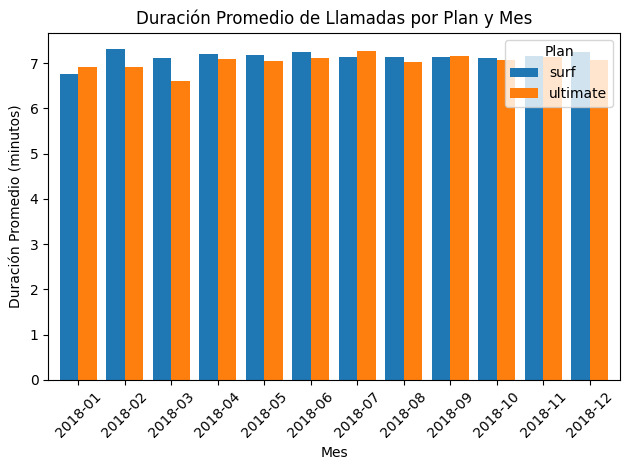

In [32]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_calls_plan = df_calls.merge(
    df_users[["user_id","plan"]],
    on="user_id",
    how="left"
)
cols_plans = [
    "plan_name","messages_included","mb_per_month_included","minutes_included",
    "usd_monthly_pay","usd_per_gb","usd_per_message","usd_per_minute"
]

df_calls_plan = df_calls_plan.merge(
    df_plans[cols_plans],
    left_on="plan",
    right_on="plan_name",
    how="left"
)

mean_duration_month_plan = df_calls_plan.groupby(['year_month','plan'])['duration_min_ceil'].mean().reset_index()

pivot_data = mean_duration_month_plan.pivot(index='year_month', columns='plan', values='duration_min_ceil')

plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', width=0.8)
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio (minutos)')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

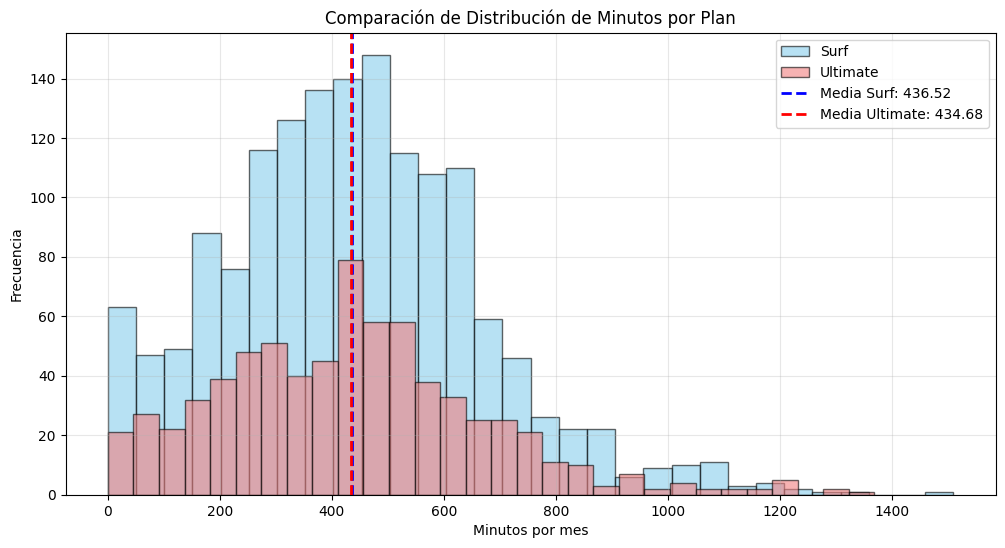

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_minutes = user_behavior_plan_info[user_behavior_plan_info['plan'] == 'surf']['total_minutes_ceil']
ultimate_minutes = user_behavior_plan_info[user_behavior_plan_info['plan'] == 'ultimate']['total_minutes_ceil']

surf_minutes_mean = surf_minutes.mean()
ultimate_minutes_mean = ultimate_minutes.mean()

plt.figure(figsize=(12, 6))
plt.hist(surf_minutes, bins=30, alpha=0.6, label='Surf', color='skyblue', edgecolor='black')
plt.hist(ultimate_minutes, bins=30, alpha=0.6, label='Ultimate', color='lightcoral', edgecolor='black')

plt.axvline(surf_minutes_mean, color='blue', linestyle='--', linewidth=2, label=f'Media Surf: {surf_minutes_mean:.2f}')
plt.axvline(ultimate_minutes_mean, color='red', linestyle='--', linewidth=2, label=f'Media Ultimate: {ultimate_minutes_mean:.2f}')

plt.title('Comparación de Distribución de Minutos por Plan')
plt.xlabel('Minutos por mes')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print("Media Surf:",surf_minutes_mean)
print("Media Ultimate:",ultimate_minutes_mean)
print("Varianza Surf:", surf_minutes.var())
print("Varianza Ultimate:", ultimate_minutes.var())

Media Surf: 436.51974110032364
Media Ultimate: 434.67601683029454
Varianza Surf: 52571.06324345624
Varianza Ultimate: 56573.63224703343


/var/folders/nn/8fxj8t5x4w3fy9hxxr41r9sw0000gn/T/ipykernel_99147/1110964983.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels, patch_artist=True,


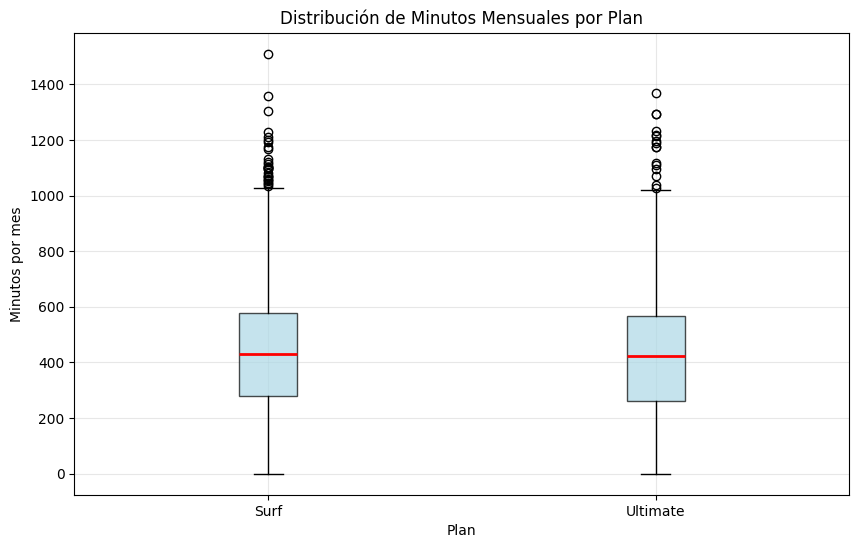

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(10, 6))

surf_clean = surf_minutes.dropna()
ultimate_clean = ultimate_minutes.dropna()

data_to_plot = [surf_clean, ultimate_clean]
labels = ['Surf', 'Ultimate']

plt.boxplot(data_to_plot, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))

plt.title('Distribución de Minutos Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Minutos por mes')
plt.grid(True, alpha=0.3)
plt.show()

Según lo que podemos observar, el comportamiento de los clientes al menos en cuanto al uso de llamadas no varía en función del plan que tienen contratado. 
La distribucion es practicamente la misma y la media de duración por llamada es practicamente identica para el caso de surf y ultimate. 
Las varianzas tampoco son lo suficientemente diferentes como para indicar una diferencia relevante en cuanto al comportamiento de los usuarios.

Lo mas seguro es que la decisión de contratar uno u otro plan no se deba a los minutos de llamada incluidos sino a los habitos de consumo de internet de los clientes.

### Mensajes

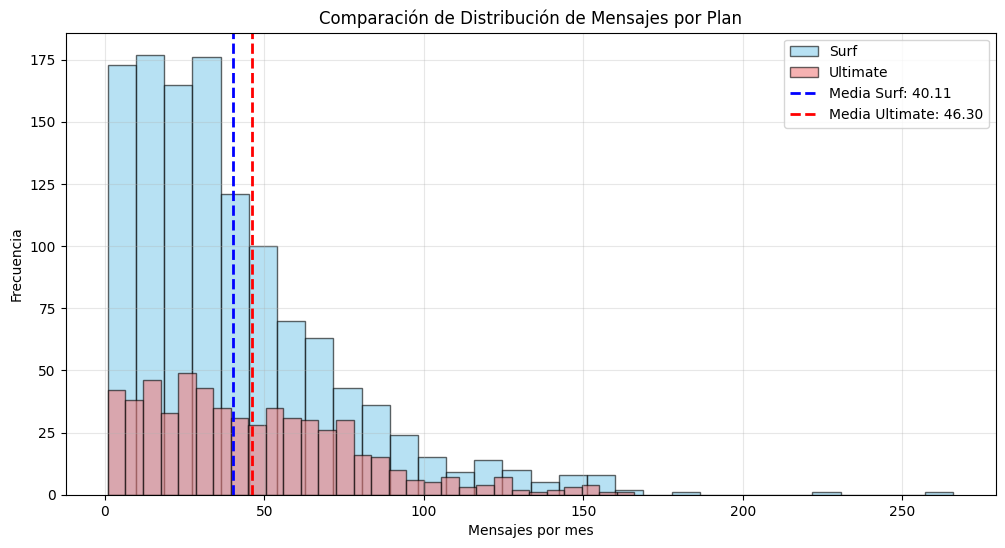

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages_per_month = df_messages.groupby(['year_month','user_id'])['id'].count().reset_index()
messages_per_month.columns = ['year_month', 'user_id', 'total_messages']
messages_with_plan = messages_per_month.merge(df_users[['user_id', 'plan']], on='user_id', how='left')

surf_messages = messages_with_plan[messages_with_plan['plan'] == 'surf']['total_messages']
ultimate_messages = messages_with_plan[messages_with_plan['plan'] == 'ultimate']['total_messages']

plt.figure(figsize=(12, 6))
plt.hist(surf_messages, bins=30, alpha=0.6, label='Surf', color='skyblue', edgecolor='black')
plt.hist(ultimate_messages, bins=30, alpha=0.6, label='Ultimate', color='lightcoral', edgecolor='black')

plt.axvline(surf_messages.mean(), color='blue', linestyle='--', linewidth=2, 
           label=f'Media Surf: {surf_messages.mean():.2f}')
plt.axvline(ultimate_messages.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Media Ultimate: {ultimate_messages.mean():.2f}')

plt.title('Comparación de Distribución de Mensajes por Plan')
plt.xlabel('Mensajes por mes')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Ambas distribuciones presentan un sesgo a la derecha. Al igual que con las llamadas, parece que el comportamiento de los usuarios en cuanto a los mensajes que envían al mes no afecta la elección del plan ya que no muestra diferencias significativas. La media de Ultimate es ligermante mayor pero no parece significativa. 

### Internet

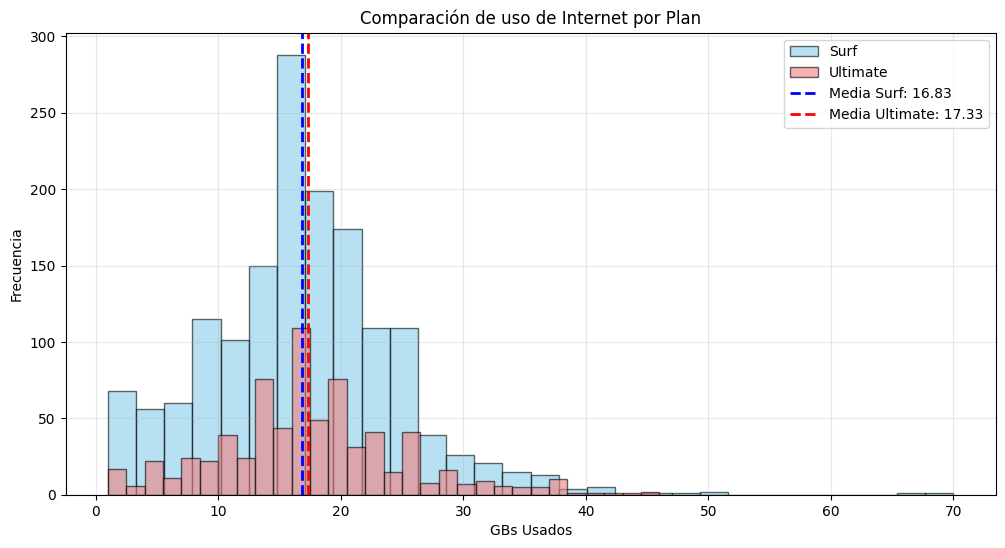

In [37]:
behavior_internet = gb_per_user_month.groupby(['user_id','year_month'])['gb_facturados'].sum().reset_index()
behavior_internet_with_plan = behavior_internet.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
behavior_internet_with_plan.head()

surf_internet = behavior_internet_with_plan[behavior_internet_with_plan['plan'] == 'surf']['gb_facturados']
ultimate_internet = behavior_internet_with_plan[behavior_internet_with_plan['plan'] == 'ultimate']['gb_facturados']

plt.figure(figsize=(12, 6))
plt.hist(surf_internet, bins=30, alpha=0.6, label='Surf', color='skyblue', edgecolor='black')
plt.hist(ultimate_internet, bins=30, alpha=0.6, label='Ultimate', color='lightcoral', edgecolor='black')

plt.axvline(surf_internet.mean(), color='blue', linestyle='--', linewidth=2, 
           label=f'Media Surf: {surf_internet.mean():.2f}')
plt.axvline(ultimate_internet.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Media Ultimate: {ultimate_internet.mean():.2f}')

plt.title('Comparación de uso de Internet por Plan')
plt.xlabel('GBs Usados')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Podemos observar que el uso de internet tampoco muestra una diferencia significativa en función del plan elegido por los clientes. Las medias son practicamente identicas. 

Podemos ver que hay muchos clientes del plan surf excediendo los 15 gb por lo que generan ingresos por excedentes pero seguramente no deben estar muy conformes con eso y corremos el riesgo de perderlos debido a esa insatisfaccion. Probablemente les convenga migrar al plan ultimate.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

=== ESTADÍSTICAS DE INGRESOS ===
Media Surf: $60.71
Media Ultimate: $72.31
Mediana Surf: $40.36
Mediana Ultimate: $70.00
Desviación estándar Surf: $55.39
Desviación estándar Ultimate: $11.40


/var/folders/nn/8fxj8t5x4w3fy9hxxr41r9sw0000gn/T/ipykernel_99147/3831679645.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_revenue, labels=labels_revenue, patch_artist=True,


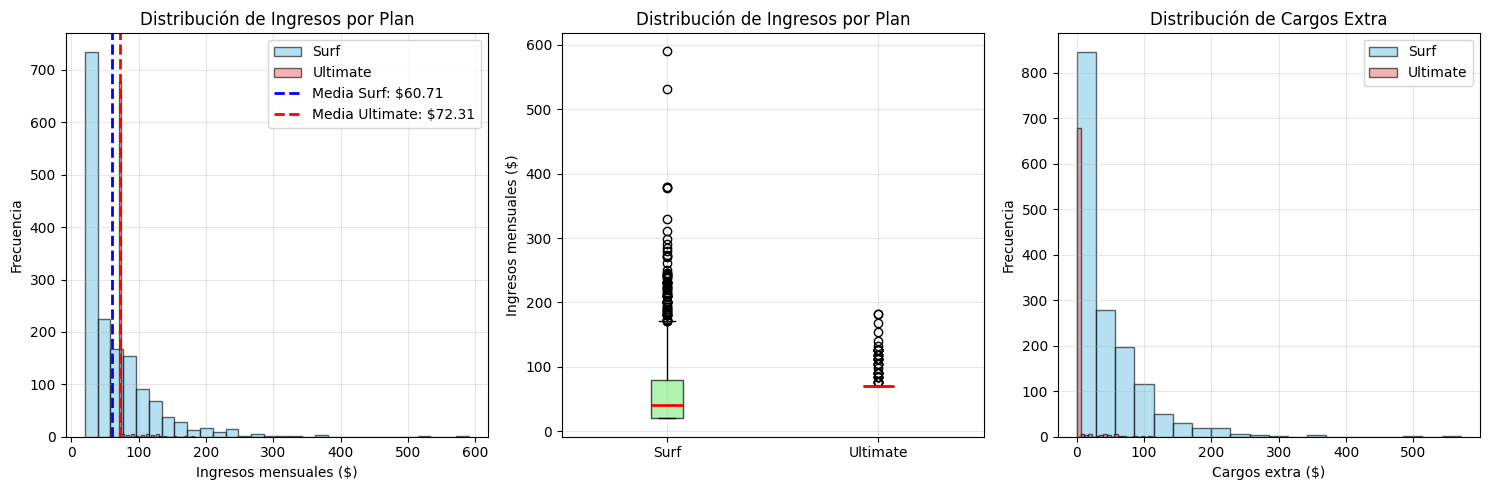

In [38]:
# Ingresos por plan
surf_revenue = df_ingresos[df_ingresos['plan'] == 'surf']['bill_total']
ultimate_revenue = df_ingresos[df_ingresos['plan'] == 'ultimate']['bill_total']

print("=== ESTADÍSTICAS DE INGRESOS ===")
print(f"Media Surf: ${surf_revenue.mean():.2f}")
print(f"Media Ultimate: ${ultimate_revenue.mean():.2f}")
print(f"Mediana Surf: ${surf_revenue.median():.2f}")
print(f"Mediana Ultimate: ${ultimate_revenue.median():.2f}")
print(f"Desviación estándar Surf: ${surf_revenue.std():.2f}")
print(f"Desviación estándar Ultimate: ${ultimate_revenue.std():.2f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(surf_revenue, bins=30, alpha=0.6, label='Surf', color='skyblue', edgecolor='black')
plt.hist(ultimate_revenue, bins=30, alpha=0.6, label='Ultimate', color='lightcoral', edgecolor='black')
plt.axvline(surf_revenue.mean(), color='blue', linestyle='--', linewidth=2, 
           label=f'Media Surf: ${surf_revenue.mean():.2f}')
plt.axvline(ultimate_revenue.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Media Ultimate: ${ultimate_revenue.mean():.2f}')
plt.title('Distribución de Ingresos por Plan')
plt.xlabel('Ingresos mensuales ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
data_revenue = [surf_revenue, ultimate_revenue]
labels_revenue = ['Surf', 'Ultimate']
plt.boxplot(data_revenue, labels=labels_revenue, patch_artist=True,
            boxprops=dict(facecolor='lightgreen', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.title('Distribución de Ingresos por Plan')
plt.ylabel('Ingresos mensuales ($)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
surf_extra = df_ingresos[df_ingresos['plan'] == 'surf']['extra_charges']
ultimate_extra = df_ingresos[df_ingresos['plan'] == 'ultimate']['extra_charges']
plt.hist(surf_extra, bins=20, alpha=0.6, label='Surf', color='skyblue', edgecolor='black')
plt.hist(ultimate_extra, bins=20, alpha=0.6, label='Ultimate', color='lightcoral', edgecolor='black')
plt.title('Distribución de Cargos Extra')
plt.xlabel('Cargos extra ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

En cuanto a los ingresos podemos observar que en promedio el plan ultimate genera mas ingresos. 

El boxplot nos dice que los ingresos por el plan ultimate son mas estables tenemos una dispersión muy compacta (muy pocos valores atipicos).

Estas graficas tambien nos dan una pieza de información muy importante. Los ingresos del plan surf se basan principalmente en los cargos extra por exceder los limites de consumo, mientras que los ingresos del plan ultimate vienen casi en su totalidad de las cuotas fijas.

Convendría identificar a los clientes de surf que representan valores atipicos y ofrecerles el cambio a ultimate si buscamos satisfacción y fidelización. de esta manera reducimos sus cargos por excesos pero elevamos su cuota fija y priorizamos tener ingresos mas estables en lugar de picos pronunciados de consumo.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [39]:
# Prueba las hipótesis
surf_revenue = df_ingresos[df_ingresos['plan'] == 'surf']['bill_total']
ultimate_revenue = df_ingresos[df_ingresos['plan'] == 'ultimate']['bill_total']

t_stat, p_val = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False, alternative='two-sided')

print(f"Surf - Media: ${surf_revenue.mean():.2f}, n = {len(surf_revenue)}")
print(f"Ultimate - Media: ${ultimate_revenue.mean():.2f}, n = {len(ultimate_revenue)}")
print()

alpha = 0.05
print(f"t = {t_stat:.3f}, p = {p_val:.4f}")
print("Conclusión:",
      "Rechazamos H0 (medias distintas)" if p_val <= alpha else "No rechazamos H0 (sin evidencia de diferencia)")


Surf - Media: $60.71, n = 1573
Ultimate - Media: $72.31, n = 720

t = 7.952, p = 0.0000
Conclusión: Rechazamos H0 (medias distintas)


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [40]:
# Prueba las hipótesis
ny_nj_users = df_users[df_users['city'].str.contains('NY-NJ', na=False)]
ny_nj_user_ids = ny_nj_users['user_id'].tolist()

ny_nj_revenue = df_ingresos[df_ingresos['user_id'].isin(ny_nj_user_ids)]['bill_total']
other_revenue = df_ingresos[~df_ingresos['user_id'].isin(ny_nj_user_ids)]['bill_total']

alpha = 0.05
t_stat, p_val = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False, alternative='two-sided')

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_val}")
print(f"Alpha: {alpha}")

if p_val <= alpha:
    print("Rechazamos H0: hay evidencia de diferencia en el ingreso promedio.")
else:
    print("No rechazamos H0: no hay evidencia de diferencia en el ingreso promedio.")

Estadístico t: -2.1309454999502133
Valor p: 0.0335256158853001
Alpha: 0.05
Rechazamos H0: hay evidencia de diferencia en el ingreso promedio.


## Conclusión general

El consumo tanto de minutos, sms, internet no parece ser diferente en función del plan elegido por los clientes. 

El modelo de negocio de surf se basa en el cobro de tarifas extra debido a excesos de consumo mientras que ultimate presenta ingresos mas estables y predecibles basados en las cuotas fijas.

En cuanto a las pruebas de hipotesis: probamos primero para saber si el ingreso promedio por cliente difiere para cada plan. Después de realizar las pruebas obtuvimos evidencia de que efectivamente los ingresos promedio son diferentes.
Además de que la diferencia es significativa ($15 más) Ultimate es estable (casi todo el ingreso proviene de la cuota fija). Surf es disperso (cola larga por excedentes).

Posteriormente probamos para saber si el ingreso promedio de la zona NY-NJ es diferente al de los usuarios de otras regiones. Despues de correr un analisis t bilateral concluimos que si existe diferencia estadisticamente significativa aunque no genera un impacto significativo.

En terminos generales el consumo de datos es similar entre planes, pero Ultimate transforma ese consumo en ingresos más altos y estables; Surf depende de excedentes y es más volátil. 

Como estrategia para mantener e incrementar la satisfacción de los clientes proponemos ofrecer un upgrade a los usuarios de surf que mas excesos de consumo presentan para de esta manera disminuir el riesgo de que cancelen su servicio.